In [38]:
import pandas as pd
import pickle

In [ ]:
with open ('data/scrubbed_data_yelp_inspec.pickle','rb') as f:
    df_merged = pickle.load(f)

In [ ]:
df_merged.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,display_phone,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,wine_bars,womenscloth,wraps,delivery,pickup,restaurant_reservation,num_of_cat,mainstream_category,rare_category,price_value
0,50122550,& CAFE COFFEE SHOP,Manhattan,222,EAST 51 STREET,10022.0,(908) 590-3763,Coffee/Tea,2023-01-03,Violations were cited in the following area(s).,...,0,0,0,0,0,0,3,1,0,0.0
1,50126158,& SON STEAKEASY,Manhattan,62,WEST 9 STREET,10011.0,(212) 933-1193,American,2023-02-04,Violations were cited in the following area(s).,...,1,0,0,0,0,0,3,1,0,0.0
2,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031.0,(212) 491-7466,Bakery Products/Desserts,2022-10-20,Violations were cited in the following area(s).,...,0,0,0,1,0,0,2,1,0,1.0
3,50059935,108 FOOD DRIED HOT POT,Manhattan,2794,BROADWAY,10025.0,(917) 675-6878,Chinese,2022-05-17,Violations were cited in the following area(s).,...,0,0,0,1,1,0,2,1,0,2.0
4,41092609,10TH AVENUE COOKSHOP,Manhattan,156,10 AVENUE,10011.0,(212) 924-4440,American,2022-04-11,Violations were cited in the following area(s).,...,0,0,0,1,1,0,2,1,0,2.0


In [ ]:
df_merged["GRADE"].replace({'Establishment re-opened by DOHMH.': 1,
                            'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.': 1}, inplace = True)

In [ ]:
df_merged['GRADE'].value_counts()

5    2195
1     803
4     137
3      39
Name: GRADE, dtype: int64

In [ ]:
df_merged['rating'].value_counts()

4.0    1469
3.5     775
4.5     570
3.0     210
2.5      62
5.0      46
2.0      22
0.0      15
1.5       3
1.0       2
Name: rating, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
column_names_to_normalize = ['GRADE', 'rating']
x = df_merged[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(
    x_scaled, 
    columns=column_names_to_normalize, 
    index = df_merged.index
)
df_merged[column_names_to_normalize] = df_temp


In [ ]:
df_merged['combined_score'] = df_merged['rating']*df_merged['GRADE'] 

<Axes: >

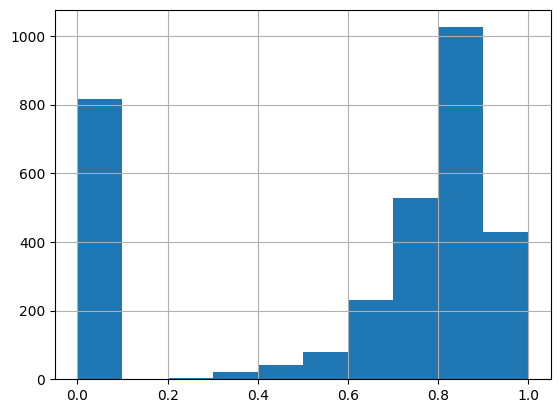

In [ ]:
df_merged["combined_score"].hist()

In [ ]:
(df_merged['INSPECTION DATE'].sort_values()>='2023-01-01').sum()

817

In [ ]:
df_merged['price_value'].astype(str)

# Get dummy variables for categorical columns that have not yet been one-hot encoded:
df_merged = pd.get_dummies(df_merged, columns = ['neighborhood', 'CRITICAL FLAG','count_range',
                          'price_value'])

In [ ]:
latest_inspection_records = df_merged[df_merged['INSPECTION DATE']>='2023-01-01']

In [ ]:
df_merged = df_merged[df_merged['INSPECTION DATE']<'2023-01-01']

In [ ]:
with open ('data/scrubbed_data_yelp_inspec_latest.pickle','wb')as f:
    pickle.dump(latest_inspection_records, f)

In [ ]:
with open ('data/scrubbed_data_yelp_inspec_older.pickle','wb')as f:
    pickle.dump(df_merged, f)

In [ ]:
# Import Data:
with open ('data/scrubbed_data_yelp_inspec_older.pickle','rb') as f:
    df_merged = pickle.load(f)

print(len(df_merged))
df_merged.head()

2357


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,display_phone,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,count_range_11-20,count_range_2-5,count_range_21-30,count_range_31+,count_range_6-10,price_value_0.0,price_value_1.0,price_value_2.0,price_value_3.0,price_value_4.0
2,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031.0,(212) 491-7466,Bakery Products/Desserts,2022-10-20,Violations were cited in the following area(s).,...,0,0,0,0,1,0,1,0,0,0
3,50059935,108 FOOD DRIED HOT POT,Manhattan,2794,BROADWAY,10025.0,(917) 675-6878,Chinese,2022-05-17,Violations were cited in the following area(s).,...,0,1,0,0,0,0,0,1,0,0
4,41092609,10TH AVENUE COOKSHOP,Manhattan,156,10 AVENUE,10011.0,(212) 924-4440,American,2022-04-11,Violations were cited in the following area(s).,...,0,1,0,0,0,0,0,1,0,0
6,50088380,123 Burger Shot Beer,Manhattan,712,WEST 125 STREET,10027.0,(646) 850-0193,American,2022-12-14,Violations were cited in the following area(s).,...,0,1,0,0,0,0,0,1,0,0
7,50067483,15 STORIES,Manhattan,444,PARK AVENUE SOUTH,10016.0,(212) 804-8880,Bottled Beverages,2022-10-26,Violations were cited in the following area(s).,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
df_merged['INSPECTION DATE'].sort_values()

2303   2018-11-07
2921   2018-11-13
1195   2019-03-14
528    2019-03-25
3049   2019-03-27
          ...    
1447   2022-12-29
2452   2022-12-29
1067   2022-12-29
949    2022-12-29
483    2022-12-29
Name: INSPECTION DATE, Length: 2357, dtype: datetime64[ns]

In [ ]:
# Identify our X and y variables:
X = df_merged.drop(columns=['CAMIS','DBA','BORO','BUILDING','STREET','ZIPCODE','display_phone','CUISINE DESCRIPTION',
                           'INSPECTION DATE','ACTION','SCORE','GRADE DATE','INSPECTION TYPE','Latitude','Longitude',
                           '#_of_inspections','name','price','rating','review_count','transactions',
                            'categories_clean','latitude','longitude','address','city','zip_code',
                            'state','num_of_cat','combined_score', 'GRADE'],
                   axis=1)
y = df_merged.loc[:,'combined_score']

In [ ]:
from sklearn.model_selection import train_test_split
# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
d_tree = DecisionTreeRegressor(criterion='poisson', random_state=42)
d_tree = d_tree.fit(X_train, y_train)
y_pred_test_d_tree = d_tree.predict(X_test)
y_pred_train_d_tree = d_tree.predict(X_train)

In [ ]:
import numpy as np

In [ ]:
def reg_metrics(y_test, y_pred, X_train):
    from sklearn.metrics import mean_squared_error, r2_score 

    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # Scikit-learn doesn't have adjusted r-square, hence custom code
    n = y_pred.shape[0]
    k = X_train.shape[1]
    adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

    print(rmse, r2, adj_r_sq)

In [ ]:
reg_metrics(y_test, y_pred_test_d_tree, X_train)

0.4046464374730452 -0.48629541478967253 -1.556717416681991


In [ ]:
from sklearn.ensemble import RandomForestRegressor
r_forest = RandomForestRegressor(max_depth = 9, min_samples_split = 9)
ran_f = r_forest.fit(X_train, y_train)
y_pred_test_r_forest = ran_f.predict(X_test)
y_pred_train_r_forest = ran_f.predict(X_train)

In [ ]:
reg_metrics(y_test, y_pred_test_r_forest, X_train)

0.31338488480455584 0.10852373045990604 -0.5335127069704293


In [ ]:
pickle.dump(r_forest, open('models/random_forest_model.pickle', 'wb'))

In [ ]:
pickle.dump(d_tree, open('models/decision_tree_model.pickle', 'wb'))

## HYPERPARAMETER TUNING

In [91]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

In [49]:
with open ('data/scrubbed_data_yelp_inspec_older.pickle','rb') as f:
    df_older = pd.read_pickle(f)

df_older = df_older.reset_index(drop=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X = df_older.drop(columns=['CAMIS','DBA','BORO','BUILDING','STREET','ZIPCODE','display_phone','CUISINE DESCRIPTION',
                           'INSPECTION DATE','ACTION','SCORE','GRADE DATE','INSPECTION TYPE','Latitude','Longitude',
                           'name','price','rating','review_count','transactions','categories_clean','latitude','longitude',
                           'address','city','zip_code','state','num_of_cat','combined_score', 'GRADE'],
                   axis=1)
y = df_older.loc[:,'combined_score']

In [51]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

for model in regressors[:10]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.011s
	Prediction time: 0.062s
	Explained variance: -0.04755335625441548
	Mean absolute error: 0.25968926553672317
	R2 score: -0.047577305004994574

GradientBoostingRegressor()
	Training time: 0.446s
	Prediction time: 0.006s
	Explained variance: 0.1459533613683106
	Mean absolute error: 0.24149130394435805
	R2 score: 0.14543214710135388

KNeighborsRegressor()
	Training time: 0.005s
	Prediction time: 0.040s
	Explained variance: -0.04755335625441548
	Mean absolute error: 0.25968926553672317
	R2 score: -0.047577305004994574

ExtraTreesRegressor()
	Training time: 2.706s
	Prediction time: 0.026s
	Explained variance: -0.1367992553613624
	Mean absolute error: 0.2501864406779661
	R2 score: -0.1381673829968848

RandomForestRegressor()
	Training time: 2.017s
	Prediction time: 0.024s
	Explained variance: 0.06872826464288417
	Mean absolute error: 0.2382404190207158
	R2 score: 0.06734262558129467

DecisionTreeRegressor()
	Training time: 0.037s
	Prediction time:

In [52]:
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 3, n_jobs=-1, return_train_score=True, scoring='neg_mean_absolute_error')
grid_GBR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.5)

 The best score across ALL searched params:
 -0.24395648584486196

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}


In [53]:
cv_results_gbr = pd.DataFrame(grid_GBR.cv_results_)

In [72]:
GBR_best = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 4, n_estimators = 500, subsample = 0.5)
GBR_best.fit(X_train, y_train)

y_pred = GBR_best.predict(X_test)
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))

	Explained variance: 0.14657212624661808
	Mean absolute error: 0.23960970510707005
	R2 score: 0.1459410589353588


In [73]:
pickle.dump(GBR_best, open('models/gradient_boosting_model.pickle', 'wb'))

In [56]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'copy_X':[True, False], 'positive': [True, False]}
grid = GridSearchCV(model, parameters, cv=3, return_train_score=True, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LinearRegression(fit_intercept=False, positive=True)

 The best score across ALL searched params:
 -0.26130509098000165

 The best parameters across ALL searched params:
 {'copy_X': True, 'fit_intercept': False, 'positive': True}


In [57]:
cv_results_lr = pd.DataFrame(grid.cv_results_)

In [58]:
model = LinearRegression(copy_X = True, fit_intercept = False, positive = True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Explained variance:", explained_variance_score(y_test, y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

Explained variance: 0.08059837788960911
Mean absolute error: 0.25516065536092575
R2 score: 0.08027729671159411


In [59]:
pickle.dump(model, open('models/linear_regression_model.pickle', 'wb'))

In [60]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

In [61]:
grid_cv_model = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=3, return_train_score=True)
grid_cv_model.fit(X_train,y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_cv_model.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_cv_model.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_cv_model.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Ridge(alpha=20)

 The best score across ALL searched params:
 -0.24773459717468113

 The best parameters across ALL searched params:
 {'alpha': 20}


In [62]:
cv_results_ridge = pd.DataFrame(grid_cv_model.cv_results_)
cv_results_ridge = cv_results_ridge[cv_results_ridge['param_alpha']<=200]
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.011447,0.000428,0.003490,0.000136,0.0001,{'alpha': 0.0001},-0.255764,-0.264572,-0.257152,-0.259163,0.003867,28,-0.219407,-0.212718,-0.216801,-0.216309,0.002753
1,0.010912,0.000954,0.003630,0.000353,0.001,{'alpha': 0.001},-0.255745,-0.264564,-0.257138,-0.259149,0.003871,27,-0.219415,-0.212725,-0.216810,-0.216317,0.002753
2,0.010609,0.000400,0.003640,0.000025,0.01,{'alpha': 0.01},-0.255555,-0.264483,-0.256998,-0.259012,0.003913,26,-0.219491,-0.212792,-0.216899,-0.216394,0.002758
3,0.010567,0.000683,0.003637,0.000082,0.05,{'alpha': 0.05},-0.254754,-0.264159,-0.256405,-0.258439,0.004100,25,-0.219814,-0.213068,-0.217280,-0.216721,0.002782
4,0.010819,0.000056,0.003971,0.000429,0.1,{'alpha': 0.1},-0.253843,-0.263808,-0.255727,-0.257793,0.004322,24,-0.220181,-0.213376,-0.217709,-0.217089,0.002813


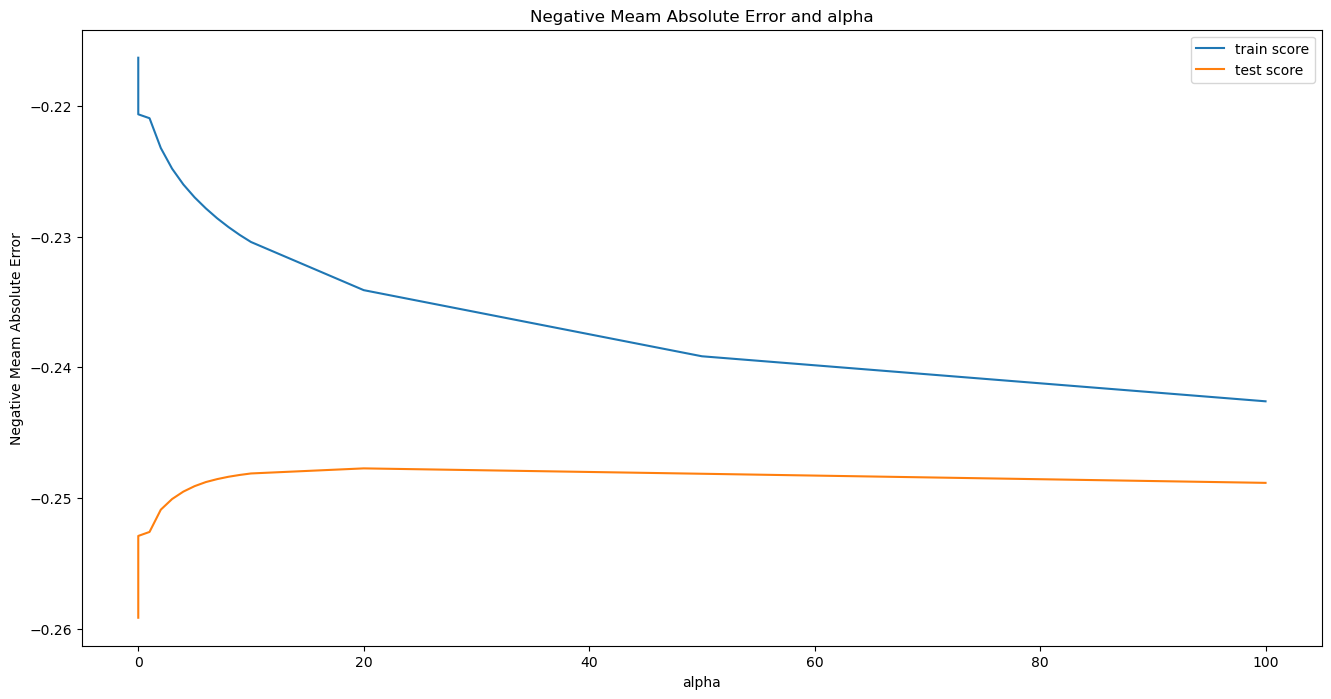

In [63]:
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results_ridge['param_alpha'],cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'],cv_results_ridge['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [64]:
alpha = 20 
ridge = Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print("Explained variance:", explained_variance_score(y_test, y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

Explained variance: 0.14489912002812566
Mean absolute error: 0.24287697992126223
R2 score: 0.14477413006430562


In [65]:
pickle.dump(ridge, open('models/ridge_model.pickle', 'wb'))

In [66]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1, scoring='neg_mean_absolute_error', cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=12)

 The best score across ALL searched params:
 -0.2643066295628258

 The best parameters across ALL searched params:
 {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}


In [67]:
cv_results_rf = pd.DataFrame(grid_search.cv_results_)

In [70]:
rf_best = RandomForestRegressor(bootstrap = True, max_depth = 100, max_features = 3, min_samples_leaf = 3, min_samples_split = 12, n_estimators = 100)
rf_best.fit(X_train, y_train)

y_pred = rf_best.predict(X_test)
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))

	Explained variance: 0.028024141625167753
	Mean absolute error: 0.26719032230287265
	R2 score: 0.026465177740834567


In [71]:
pickle.dump(rf_best, open('models/rf_model.pickle', 'wb'))

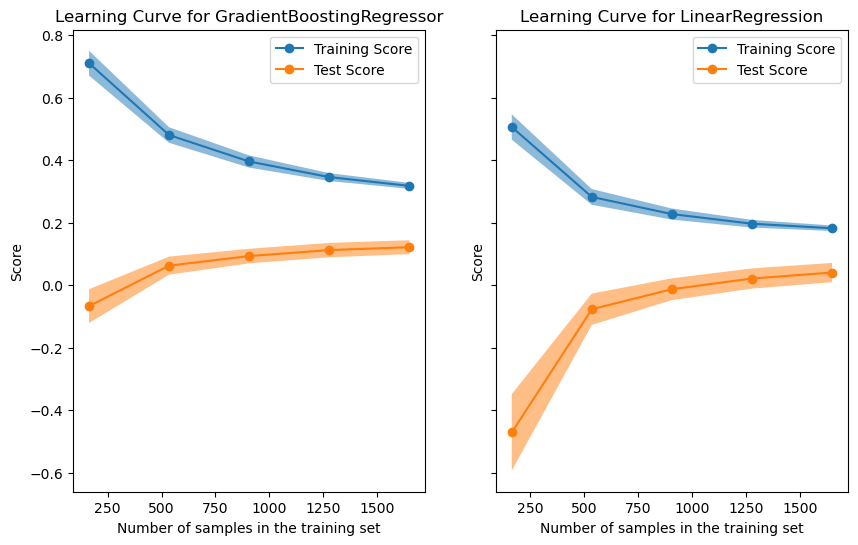

In [92]:
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.3, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "scoring" : "r2"
}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
for ax_idx, estimator in enumerate([GBR_best, model]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

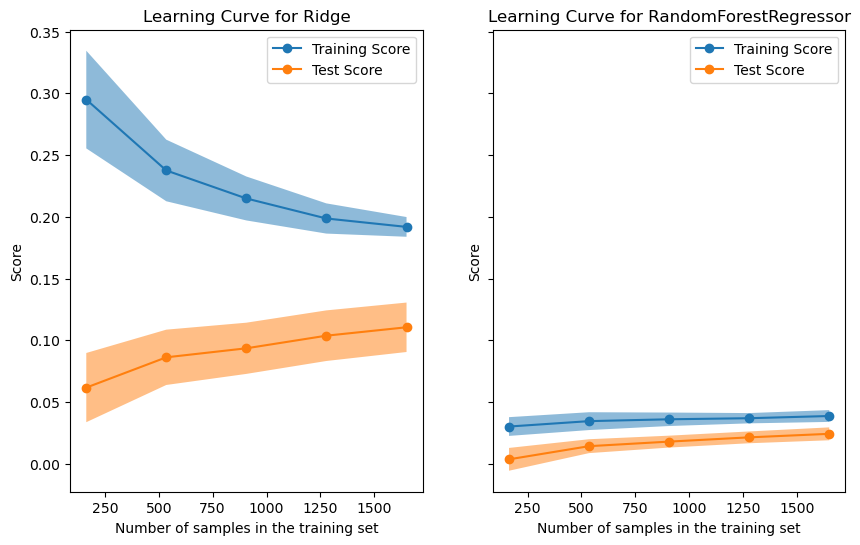

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
for ax_idx, estimator in enumerate([ridge, rf_best]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")